# Machine Learning - SVM

<img src="image.jpeg" width="1000">

## Spotify musics prediction

- Objective: creat a model capable to predict if an user likes or not a music from Spotify


# Libraries

In [122]:
'''
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import svm'''

'\nfrom sklearn.model_selection import cross_val_predict\nfrom sklearn import metrics\nimport matplotlib.pyplot as plt\nimport pandas as pd\nimport numpy as np\nfrom sklearn import svm'

In [123]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Loading dataset

#### For futher information on the dataset, just go and check the website below:
- https://developer.spotify.com/web-api/get-audio-features/

In [124]:
# importing dataset
dataset = pd.read_csv('data.csv')

In [125]:
# it allows seeing all lines and columns of the dataset
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None) 

In [126]:
dataset.shape

(2017, 17)

# EAD + Feature Engineering

In [127]:
# having a quick look at it
dataset.head(5)

,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [128]:
# checking columns to change target's position to the last one
dataset.columns

Index(['id', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'target',
       'song_title', 'artist'],
      dtype='object')

In [129]:
# changing positions
df = dataset[['id', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 
       'song_title', 'artist','target']]

In [130]:
# having a quick look at it
df.head()

,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,song_title,artist,target
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,Mask Off,Future,1
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,Redbone,Childish Gambino,1
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,Xanny Family,Future,1
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,Master Of None,Beach House,1
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,Parallel Lines,Junior Boys,1


#### There is no need in keeping two features of the dataset, such as: id and song_title

In [131]:
# dropping features
df.drop(['id','song_title'], axis=1, inplace=True)

In [132]:
# having a quick look at it
df.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,artist,target
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,Future,1
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,Childish Gambino,1
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,Future,1
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,Beach House,1
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,Junior Boys,1


In [133]:
df.corr()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
acousticness,1.000000,-0.179894,0.071536,-0.646319,0.144397,-0.081037,-0.117126,-0.562021,0.068028,-0.099893,-0.127596,-0.190353,-0.152227,-0.129627
danceability,-0.179894,1.000000,0.004695,0.038557,-0.130561,0.022325,-0.132044,0.104362,-0.047867,0.142661,-0.143538,0.128909,0.442061,0.176706
duration_ms,0.071536,0.004695,1.000000,-0.144473,0.305403,0.023570,0.023203,-0.273798,-0.074806,-0.079562,-0.076469,-0.040157,-0.120030,0.146749
energy,-0.646319,0.038557,-0.144473,1.000000,-0.122890,0.072886,0.217435,0.762177,-0.070263,0.093102,0.165721,0.182895,0.278383,0.039688
instrumentalness,0.144397,-0.130561,0.305403,-0.122890,1.000000,-0.009640,0.001063,-0.354625,-0.030099,-0.155349,0.000347,-0.070721,-0.194630,0.152594
key,-0.081037,0.022325,0.023570,0.072886,-0.009640,1.000000,0.049739,0.050929,-0.195040,0.019116,0.040301,0.024937,0.032485,0.033594
liveness,-0.117126,-0.132044,0.023203,0.217435,0.001063,0.049739,1.000000,0.156648,-0.018587,0.092403,0.010558,0.018199,-0.053011,0.026364
loudness,-0.562021,0.104362,-0.273798,0.762177,-0.354625,0.050929,0.156648,1.000000,-0.044015,0.088844,0.156418,0.143011,0.204968,-0.072000
mode,0.068028,-0.047867,-0.074806,-0.070263,-0.030099,-0.195040,-0.018587,-0.044015,1.000000,-0.049398,-0.059995,-0.039038,-0.032879,-0.072336
speechiness,-0.099893,0.142661,-0.079562,0.093102,-0.155349,0.019116,0.092403,0.088844,-0.049398,1.000000,0.111359,0.113529,0.054419,0.154006


<img src="image3.jpeg" width="500">

<IPython.core.display.Javascript object>


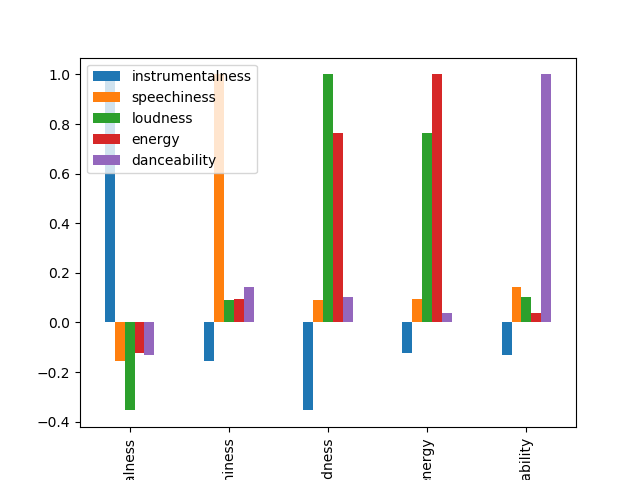

In [136]:
%matplotlib notebook
df[['instrumentalness','speechiness','loudness','energy','danceability']].corr().plot(kind='bar')

<IPython.core.display.Javascript object>


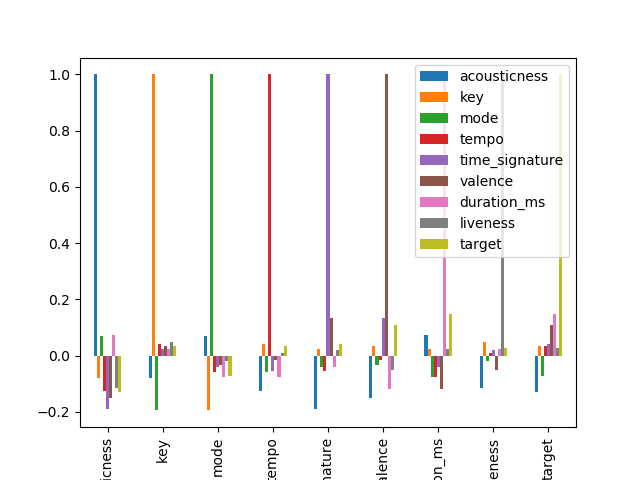

In [135]:
%matplotlib notebook
df[['acousticness','key','mode','tempo','time_signature','valence','artist','duration_ms','liveness','target']].corr().plot(kind='bar')

#### As you can see in the former code, basically, there is no correlation between columns (if so, it's TOO LOW). It'd better plot some graphs to comprehend more the dataset and its features. The main idea is to drop features that have the same behavior and explain the phenomenon as well if you compare them with other columns

### Graphs

In [15]:
# all columns' name
df.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'artist',
       'target'],
      dtype='object')

In [16]:
# having a lot at ARTIST feature
df.artist.value_counts()

Drake                                                                                 16
Rick Ross                                                                             13
Disclosure                                                                            12
Backstreet Boys                                                                       10
WALK THE MOON                                                                         10
FIDLAR                                                                                 9
Crystal Castles                                                                        9
Kanye West                                                                             8
Future                                                                                 8
Michael Jackson                                                                        8
Demi Lovato                                                                            8
Fall Out Boy         

#### There are MANY different types the artists

In [17]:
# checking missing values
df.isnull().sum()

acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
artist              0
target              0
dtype: int64

#### No missing data

### Similar and non-similar graphs when it comes to Behavior

In [18]:
# all columns
df.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'artist',
       'target'],
      dtype='object')

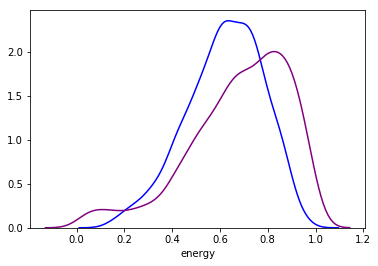

In [19]:
%matplotlib inline
import seaborn as sns
sns.distplot(df['danceability'], hist=False, kde=True,bins=int(180/5), color='blue',hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 1.5})
sns.distplot(df['energy'], hist=False, kde=True,bins=int(180/5), color='purple',hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 1.5})

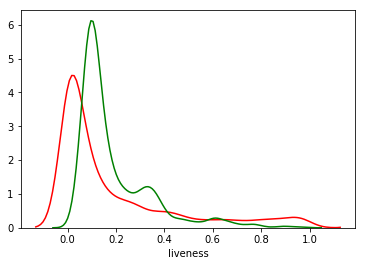

In [20]:
sns.distplot(df['acousticness'], hist=False, kde=True,bins=int(180/5), color='red',hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 1.5})
sns.distplot(df['liveness'], hist=False, kde=True,bins=int(180/5), color='green',hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 1.5})

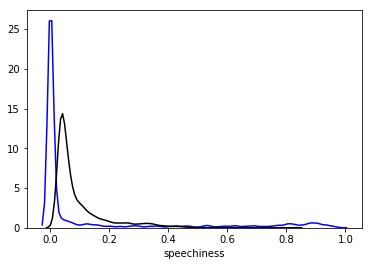

In [21]:
sns.distplot(df['instrumentalness'], hist=False, kde=True,bins=int(180/5), color='blue',hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 1.5})
sns.distplot(df['speechiness'], hist=False, kde=True,bins=int(180/5), color='black',hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 1.5})

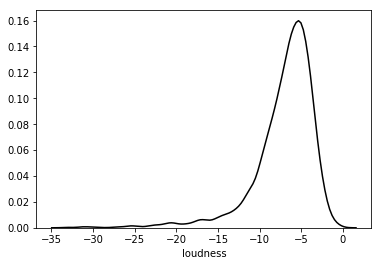

In [22]:
sns.distplot(df['loudness'], hist=False, kde=True,bins=int(180/5), color='black',hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 1.5})

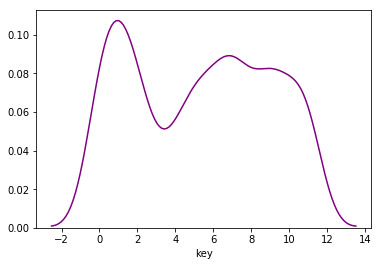

In [23]:
sns.distplot(df['key'], hist=False, kde=True,bins=int(180/5), color='purple',hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 1.5})

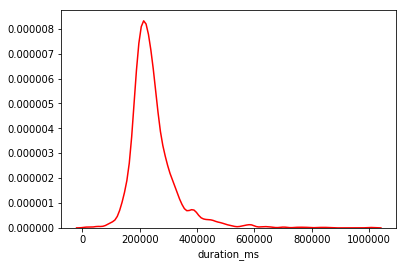

In [24]:
sns.distplot(df['duration_ms'], hist=False, kde=True,bins=int(180/5), color='red',hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 1.5})

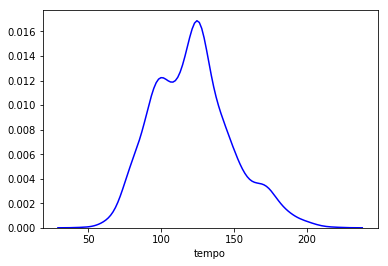

In [25]:
sns.distplot(df['tempo'], hist=False, kde=True,bins=int(180/5), color='blue',hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 1.5})


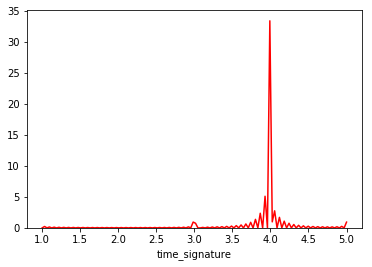

In [26]:
sns.distplot(df['time_signature'], hist=False, kde=True,bins=int(180/5), color='red',hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 1.5})

I've left similar graphs together (two graphs into one plot) and non-simular ones just alone. It seens that those features, such as Acoustiness X Liveness | Danceability X Energy | Instrumentalness X Speechness, have similar behavior and they might explain the same thing within the objective of the analysis. I suggest the application of IMPORTANCE to measeure the importance of each features versus target

In [27]:
# first step to apply Feature Importance: loading raw dataset
dataset = pd.read_csv('data.csv')

In [28]:
# code for FEATURE IMPORTANCE
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

reg = RandomForestRegressor()
X = dataset.drop(['target','id','artist'], axis=1)
y = dataset['target']
X = X.select_dtypes(exclude=['object']) #Remove categorial data

reg.fit(X,y)
fea_imp = pd.DataFrame(reg.feature_importances_,index=X.columns)
print(fea_imp.sort_values(by=0,ascending=False))

                         0
instrumentalness  0.134466
speechiness       0.125154
loudness          0.111859
energy            0.106489
danceability      0.100672
valence           0.096613
duration_ms       0.085317
acousticness      0.071207
tempo             0.063791
liveness          0.061952
key               0.033278
mode              0.006880
time_signature    0.002321


# PIPELINES (MACHINE LEARNING)

In [29]:
# raw dataset
df = pd.read_csv('data.csv')

In [30]:
# all columns' name
df.columns

Index(['id', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'target',
       'song_title', 'artist'],
      dtype='object')

## Test 1

- all features (exceptions: id, artist, song_titles) 

In [31]:
# Choosing features
y = df['target']
X = df.drop(['target','artist','id','song_title'], axis=1)

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1) 

In [33]:
def MachineLearning(Xtrain, ytrain,Xtest):
    from sklearn import svm
    model = svm.SVC() #alterar tipo de modelo
    model_overview = model.fit(Xtrain,ytrain) #.fit
    yhat = model.predict(Xtest) #.predict
    return (model,model_overview,yhat)

def Accuracy(model,X,y):
    from sklearn import svm
    from sklearn.model_selection import cross_val_predict
    from sklearn import metrics
    model = svm.SVC()
    results = cross_val_predict(model, X, y, cv=10)
    return metrics.accuracy_score(y,results)

def Metrics(model,X,y):
    from sklearn import svm
    from sklearn.model_selection import cross_val_predict
    from sklearn import metrics
    model = svm.SVC()
    results = cross_val_predict(model, X, y, cv=10)
    return metrics.classification_report(y,results)

In [34]:
# set the model here:
from sklearn import svm
svm = svm.SVC()

In [35]:
MachineLearning(X_train, y_train,X_test)
print ('Teste 1: {}'.format(Accuracy(svm,X,y)))
print(Metrics(svm,X,y))

Teste 1: 0.5121467526028756
              precision    recall  f1-score   support

           0       0.84      0.02      0.03       997
           1       0.51      1.00      0.67      1020

   micro avg       0.51      0.51      0.51      2017
   macro avg       0.68      0.51      0.35      2017
weighted avg       0.67      0.51      0.36      2017



## Test 2

**all features: 1) until 7)**

- 1) Instrumentalness
- 2) Speechiness
- 3) Loudness
- 4) Energy
- 5) Danceability
- 6) Valence
- 7) Acoustiness

'instrumentalness','speechiness','loudness','energy','danceability','valence','acoustiness'

In [36]:
# raw dataset
df = pd.read_csv('data.csv')

In [37]:
df.columns

Index(['id', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'target',
       'song_title', 'artist'],
      dtype='object')

In [38]:
# Choosing features
y = df['target']
X = df[['acousticness', 'danceability','energy','instrumentalness','loudness','speechiness','valence']]

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1) 

In [40]:
def MachineLearning(Xtrain, ytrain,Xtest):
    from sklearn import svm
    model = svm.SVC() #alterar tipo de modelo
    model_overview = model.fit(Xtrain,ytrain) #.fit
    yhat = model.predict(Xtest) #.predict
    return (model,model_overview,yhat)

def Accuracy(model,X,y):
    from sklearn import svm
    from sklearn.model_selection import cross_val_predict
    from sklearn import metrics
    model = svm.SVC()
    results = cross_val_predict(model, X, y, cv=10)
    return metrics.accuracy_score(y,results)

def Metrics(model,X,y):
    from sklearn import svm
    from sklearn.model_selection import cross_val_predict
    from sklearn import metrics
    model = svm.SVC()
    results = cross_val_predict(model, X, y, cv=10)
    return metrics.classification_report(y,results)

In [41]:
MachineLearning(X_train, y_train,X_test)
print ('Teste 2: {}'.format(Accuracy(svm,X,y)))
print(Metrics(svm,X,y))

Teste 2: 0.6514625681705504
              precision    recall  f1-score   support

           0       0.64      0.67      0.65       997
           1       0.66      0.63      0.65      1020

   micro avg       0.65      0.65      0.65      2017
   macro avg       0.65      0.65      0.65      2017
weighted avg       0.65      0.65      0.65      2017



## Test 3

**all features: 1) até 5)**

- 1) Instrumentalness
- 2) Speechiness
- 3) Loudness
- 4) Energy
- 5) Danceability
- 6) Valence
- 7) Acoustiness

'instrumentalness','speechiness','loudness','energy','danceability','valence','acoustiness'

In [42]:
# raw dataset
df = pd.read_csv('data.csv')

In [43]:
df.columns

Index(['id', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'target',
       'song_title', 'artist'],
      dtype='object')

In [44]:
# Choosing features
y = df['target']
X = df[['danceability','energy','instrumentalness','loudness','speechiness']]

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1) 

In [46]:
def MachineLearning(Xtrain, ytrain,Xtest):
    from sklearn import svm
    model = svm.SVC() #alterar tipo de modelo
    model_overview = model.fit(Xtrain,ytrain) #.fit
    yhat = model.predict(Xtest) #.predict
    return (model,model_overview,yhat)

def Accuracy(model,X,y):
    from sklearn import svm
    from sklearn.model_selection import cross_val_predict
    from sklearn import metrics
    model = svm.SVC()
    results = cross_val_predict(model, X, y, cv=10)
    return metrics.accuracy_score(y,results)

def Metrics(model,X,y):
    from sklearn import svm
    from sklearn.model_selection import cross_val_predict
    from sklearn import metrics
    model = svm.SVC()
    results = cross_val_predict(model, X, y, cv=10)
    return metrics.classification_report(y,results)

In [47]:
MachineLearning(X_train, y_train,X_test)
print ('Teste 3: {}'.format(Accuracy(svm,X,y)))
print(Metrics(svm,X,y))

Teste 3: 0.6474962816063461
              precision    recall  f1-score   support

           0       0.64      0.66      0.65       997
           1       0.66      0.64      0.65      1020

   micro avg       0.65      0.65      0.65      2017
   macro avg       0.65      0.65      0.65      2017
weighted avg       0.65      0.65      0.65      2017



## Test 4

**all features: 2), 3) and 5)**

- 1) Instrumentalness
- 2) Speechiness
- 3) Loudness
- 4) Energy
- 5) Danceability
- 6) Valence
- 7) Acoustiness

'instrumentalness','speechiness','loudness','energy','danceability','valence','acoustiness'

In [48]:
# raw dataset
df = pd.read_csv('data.csv')

In [49]:
df.columns

Index(['id', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'target',
       'song_title', 'artist'],
      dtype='object')

In [50]:
# Choosing features
y = df['target']
X = df[['speechiness','loudness','danceability']]

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1) 

In [52]:
def MachineLearning(Xtrain, ytrain,Xtest):
    from sklearn import svm
    model = svm.SVC() #alterar tipo de modelo
    model_overview = model.fit(Xtrain,ytrain) #.fit
    yhat = model.predict(Xtest) #.predict
    return (model,model_overview,yhat)

def Accuracy(model,X,y):
    from sklearn import svm
    from sklearn.model_selection import cross_val_predict
    from sklearn import metrics
    model = svm.SVC()
    results = cross_val_predict(model, X, y, cv=10)
    return metrics.accuracy_score(y,results)

def Metrics(model,X,y):
    from sklearn import svm
    from sklearn.model_selection import cross_val_predict
    from sklearn import metrics
    model = svm.SVC()
    results = cross_val_predict(model, X, y, cv=10)
    return metrics.classification_report(y,results)

In [53]:
MachineLearning(X_train, y_train,X_test)
print ('Teste 4: {}'.format(Accuracy(svm,X,y)))
print(Metrics(svm,X,y))

Teste 4: 0.6212196331184928
              precision    recall  f1-score   support

           0       0.62      0.61      0.61       997
           1       0.62      0.64      0.63      1020

   micro avg       0.62      0.62      0.62      2017
   macro avg       0.62      0.62      0.62      2017
weighted avg       0.62      0.62      0.62      2017



## Test 5

**all features: 1), 3) e 4)**

- 1) Instrumentalness
- 2) Speechiness
- 3) Loudness
- 4) Energy
- 5) Danceability
- 6) Valence
- 7) Acoustiness

'instrumentalness','speechiness','loudness','energy','danceability','valence','acoustiness'

In [54]:
# raw dataset
df = pd.read_csv('data.csv')

In [55]:
df.columns

Index(['id', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'target',
       'song_title', 'artist'],
      dtype='object')

In [56]:
# Choosing features
y = df['target']
X = df[['instrumentalness','loudness','energy']]

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1) 

In [58]:
def MachineLearning(Xtrain, ytrain,Xtest):
    from sklearn import svm
    model = svm.SVC() #alterar tipo de modelo
    model_overview = model.fit(Xtrain,ytrain) #.fit
    yhat = model.predict(Xtest) #.predict
    return (model,model_overview,yhat)

def Accuracy(model,X,y):
    from sklearn import svm
    from sklearn.model_selection import cross_val_predict
    from sklearn import metrics
    model = svm.SVC()
    results = cross_val_predict(model, X, y, cv=10)
    return metrics.accuracy_score(y,results)

def Metrics(model,X,y):
    from sklearn import svm
    from sklearn.model_selection import cross_val_predict
    from sklearn import metrics
    model = svm.SVC()
    results = cross_val_predict(model, X, y, cv=10)
    return metrics.classification_report(y,results)

In [59]:
MachineLearning(X_train, y_train,X_test)
print ('Teste 5: {}'.format(Accuracy(svm,X,y)))
print(Metrics(svm,X,y))

Teste 5: 0.6351016360932077
              precision    recall  f1-score   support

           0       0.63      0.62      0.63       997
           1       0.64      0.65      0.64      1020

   micro avg       0.64      0.64      0.64      2017
   macro avg       0.64      0.63      0.63      2017
weighted avg       0.64      0.64      0.64      2017



## Test 6

**all features: below**

'duration_ms', 'key', 'liveness', 'mode','tempo', 'time_signature'

'instrumentalness','speechiness','loudness','energy','danceability','valence','acoustiness'

In [60]:
# raw dataset
df = pd.read_csv('data.csv')

In [61]:
df.columns

Index(['id', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'target',
       'song_title', 'artist'],
      dtype='object')

In [62]:
# Choosing features
y = df['target']
X = df[['duration_ms', 'key', 'liveness', 'mode','tempo', 'time_signature']]

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1) 

In [64]:
def MachineLearning(Xtrain, ytrain,Xtest):
    from sklearn import svm
    model = svm.SVC() #alterar tipo de modelo
    model_overview = model.fit(Xtrain,ytrain) #.fit
    yhat = model.predict(Xtest) #.predict
    return (model,model_overview,yhat)

def Accuracy(model,X,y):
    from sklearn import svm
    from sklearn.model_selection import cross_val_predict
    from sklearn import metrics
    model = svm.SVC()
    results = cross_val_predict(model, X, y, cv=10)
    return metrics.accuracy_score(y,results)

def Metrics(model,X,y):
    from sklearn import svm
    from sklearn.model_selection import cross_val_predict
    from sklearn import metrics
    model = svm.SVC()
    results = cross_val_predict(model, X, y, cv=10)
    return metrics.classification_report(y,results)

In [65]:
MachineLearning(X_train, y_train,X_test)
print ('Teste 6: {}'.format(Accuracy(svm,X,y)))
print(Metrics(svm,X,y))

Teste 6: 0.5076846802181457
              precision    recall  f1-score   support

           0       0.67      0.01      0.02       997
           1       0.51      1.00      0.67      1020

   micro avg       0.51      0.51      0.51      2017
   macro avg       0.59      0.50      0.34      2017
weighted avg       0.59      0.51      0.35      2017



### Best result: Test 2
Next step: I'm going to apply Get_dummies method and Tunning method to measue the model performance. Hopefully, it will be better than the test 2 

## Test 7

**all features: below + GET DUMMIES**

- 'acousticness', 'danceability', 'energy', 'instrumentalness','loudness', 'speechiness', 'valence', 'target', 'artist'

GET_DUMMIES

In [66]:
# raw dataset
df = pd.read_csv('data.csv')

In [67]:
df.columns

Index(['id', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'target',
       'song_title', 'artist'],
      dtype='object')

In [68]:
df.shape

(2017, 17)

In [69]:
# Feature Remove Function
def remove_features(feature_list):
    for i in feature_list:
        df.drop(i, axis=1, inplace=True)
    return (print('ok!! All features have been removed'))

In [70]:
remove_features(['id', 'duration_ms','key', 'liveness','mode','tempo', 'time_signature','song_title'])

ok!! All features have been removed


In [71]:
df.columns

Index(['acousticness', 'danceability', 'energy', 'instrumentalness',
       'loudness', 'speechiness', 'valence', 'target', 'artist'],
      dtype='object')

In [72]:
df = pd.get_dummies(df, columns=['artist'], prefix=[''])

In [73]:
df.shape

(2017, 1351)

In [74]:
# Choosing features
y = df['target']
X = df.drop(['target'],axis=1)

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1) 

In [76]:
def MachineLearning(Xtrain, ytrain,Xtest):
    from sklearn import svm
    model = svm.SVC() #alterar tipo de modelo
    model_overview = model.fit(Xtrain,ytrain) #.fit
    yhat = model.predict(Xtest) #.predict
    return (model,model_overview,yhat)

def Accuracy(model,X,y):
    from sklearn import svm
    from sklearn.model_selection import cross_val_predict
    from sklearn import metrics
    model = svm.SVC()
    results = cross_val_predict(model, X, y, cv=10)
    return metrics.accuracy_score(y,results)

def Metrics(model,X,y):
    from sklearn import svm
    from sklearn.model_selection import cross_val_predict
    from sklearn import metrics
    model = svm.SVC()
    results = cross_val_predict(model, X, y, cv=10)
    return metrics.classification_report(y,results)

In [77]:
MachineLearning(X_train, y_train,X_test)
print ('Teste 7: {}'.format(Accuracy(svm,X,y)))
print(Metrics(svm,X,y))

Teste 7: 0.6103123450669311
              precision    recall  f1-score   support

           0       0.61      0.57      0.59       997
           1       0.61      0.65      0.63      1020

   micro avg       0.61      0.61      0.61      2017
   macro avg       0.61      0.61      0.61      2017
weighted avg       0.61      0.61      0.61      2017



## Test 8

**all features: below + LABEL ENCODER**

- 'acousticness', 'danceability', 'energy', 'instrumentalness','loudness', 'speechiness', 'valence', 'target', 'artist'

LABEL ENCODER

In [78]:
# raw dataset
df = pd.read_csv('data.csv')

In [79]:
df.columns

Index(['id', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'target',
       'song_title', 'artist'],
      dtype='object')

In [80]:
df.shape

(2017, 17)

In [81]:
# Feature Remove Function
def remove_features(feature_list):
    for i in feature_list:
        df.drop(i, axis=1, inplace=True)
    return (print('ok!! All features have been removed'))

In [82]:
remove_features(['id', 'duration_ms','key', 'liveness','mode','tempo', 'time_signature','song_title'])

ok!! All features have been removed


In [83]:
df.columns

Index(['acousticness', 'danceability', 'energy', 'instrumentalness',
       'loudness', 'speechiness', 'valence', 'target', 'artist'],
      dtype='object')

In [84]:
from sklearn.preprocessing import LabelEncoder
df['artist'] = LabelEncoder().fit_transform(df['artist']) 

In [85]:
df.head()

,acousticness,danceability,energy,instrumentalness,loudness,speechiness,valence,target,artist
0,0.0102,0.833,0.434,0.021900,-8.795,0.4310,0.286,1,449
1,0.1990,0.743,0.359,0.006110,-10.401,0.0794,0.588,1,222
2,0.0344,0.838,0.412,0.000234,-7.148,0.2890,0.173,1,449
3,0.6040,0.494,0.338,0.510000,-15.236,0.0261,0.230,1,95
4,0.1800,0.678,0.561,0.512000,-11.648,0.0694,0.904,1,628


In [86]:
# Choosing features
y = df['target']
X = df.drop(['target'],axis=1)

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1) 

In [88]:
def MachineLearning(Xtrain, ytrain,Xtest):
    from sklearn import svm
    model = svm.SVC() #alterar tipo de modelo
    model_overview = model.fit(Xtrain,ytrain) #.fit
    yhat = model.predict(Xtest) #.predict
    return (model,model_overview,yhat)

def Accuracy(model,X,y):
    from sklearn import svm
    from sklearn.model_selection import cross_val_predict
    from sklearn import metrics
    model = svm.SVC()
    results = cross_val_predict(model, X, y, cv=10)
    return metrics.accuracy_score(y,results)

def Metrics(model,X,y):
    from sklearn import svm
    from sklearn.model_selection import cross_val_predict
    from sklearn import metrics
    model = svm.SVC()
    results = cross_val_predict(model, X, y, cv=10)
    return metrics.classification_report(y,results)

In [89]:
MachineLearning(X_train, y_train,X_test)
print ('Teste 8: {}'.format(Accuracy(svm,X,y)))
print(Metrics(svm,X,y))

Teste 8: 0.6063460585027268
              precision    recall  f1-score   support

           0       0.61      0.56      0.58       997
           1       0.60      0.65      0.63      1020

   micro avg       0.61      0.61      0.61      2017
   macro avg       0.61      0.61      0.61      2017
weighted avg       0.61      0.61      0.61      2017



Test 2 still in first place


# Tunning

Standartization + GridSearch

In [90]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)

In [91]:
# raw dataset
df = pd.read_csv('data.csv')

In [92]:
df.columns

Index(['id', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'target',
       'song_title', 'artist'],
      dtype='object')

In [93]:
# Feature Remove Function
def remove_features(feature_list):
    for i in feature_list:
        df.drop(i, axis=1, inplace=True)
    return (print('ok!! All features have been removed'))

In [94]:
remove_features(['id', 'duration_ms','key', 'liveness','mode','tempo', 'time_signature','song_title','artist'])

ok!! All features have been removed


In [95]:
df.head()

,acousticness,danceability,energy,instrumentalness,loudness,speechiness,valence,target
0,0.0102,0.833,0.434,0.021900,-8.795,0.4310,0.286,1
1,0.1990,0.743,0.359,0.006110,-10.401,0.0794,0.588,1
2,0.0344,0.838,0.412,0.000234,-7.148,0.2890,0.173,1
3,0.6040,0.494,0.338,0.510000,-15.236,0.0261,0.230,1
4,0.1800,0.678,0.561,0.512000,-11.648,0.0694,0.904,1


In [96]:
df_temp=df.target

In [97]:
from sklearn.preprocessing import StandardScaler #importar biblioteca
scaler = StandardScaler().fit(df.drop('target',axis=1)) #instanciar 
data_scaled = scaler.transform(df.drop('target',axis=1)) #padronizar
print(data_scaled)

[[-0.68246675  1.33287384 -1.17770008 ... -0.45453036  3.76308393
  -0.8530387 ]
 [ 0.04389718  0.77382959 -1.53446769 ... -0.88157265 -0.14752949
   0.36896951]
 [-0.5893629   1.36393186 -1.28235191 ... -0.01658599  2.18371218
  -1.31028018]
 ...
 [-0.68873779  0.11539969  1.20550755 ...  1.22811199  0.15944699
  -0.1085039 ]
 [-0.71539935 -0.38152853  1.47665094 ...  1.15684964  0.44862773
   0.51059297]
 [-0.71089805 -1.07101644  1.11036953 ...  0.22990728  0.53760642
  -0.38365806]]


In [98]:
data_scaled

array([[-0.68246675,  1.33287384, -1.17770008, ..., -0.45453036,
         3.76308393, -0.8530387 ],
       [ 0.04389718,  0.77382959, -1.53446769, ..., -0.88157265,
        -0.14752949,  0.36896951],
       [-0.5893629 ,  1.36393186, -1.28235191, ..., -0.01658599,
         2.18371218, -1.31028018],
       ...,
       [-0.68873779,  0.11539969,  1.20550755, ...,  1.22811199,
         0.15944699, -0.1085039 ],
       [-0.71539935, -0.38152853,  1.47665094, ...,  1.15684964,
         0.44862773,  0.51059297],
       [-0.71089805, -1.07101644,  1.11036953, ...,  0.22990728,
         0.53760642, -0.38365806]])

In [99]:
df = pd.DataFrame(data_scaled)

In [100]:
df

,0,1,2,3,4,5,6
0,-0.682467,1.332874,-1.177700,-0.407864,-0.454530,3.763084,-0.853039
1,0.043897,0.773830,-1.534468,-0.465683,-0.881573,-0.147529,0.368970
2,-0.589363,1.363932,-1.282352,-0.487200,-0.016586,2.183712,-1.310280
3,1.602040,-0.772860,-1.634363,1.379429,-2.167220,-0.740350,-1.079636
4,-0.029201,0.370075,-0.573574,1.386753,-1.213155,-0.258753,1.647627
5,-0.703280,1.152737,-0.578330,-0.488057,0.107325,1.026989,-0.942059
6,-0.665924,0.748983,-0.996938,-0.488030,-1.095094,0.704441,-0.764018
7,-0.643994,-2.189105,-1.586794,1.943337,-1.202785,-0.618004,-0.420076
8,-0.536655,-0.095795,1.248320,-0.488057,0.919929,2.828808,-0.399844
9,-0.713707,1.351509,-0.373784,-0.488057,-0.187828,1.605351,-0.448400


In [101]:
df['target'] = df_temp

In [102]:
df.head()

,0,1,2,3,4,5,6,target
0,-0.682467,1.332874,-1.177700,-0.407864,-0.454530,3.763084,-0.853039,1
1,0.043897,0.773830,-1.534468,-0.465683,-0.881573,-0.147529,0.368970,1
2,-0.589363,1.363932,-1.282352,-0.487200,-0.016586,2.183712,-1.310280,1
3,1.602040,-0.772860,-1.634363,1.379429,-2.167220,-0.740350,-1.079636,1
4,-0.029201,0.370075,-0.573574,1.386753,-1.213155,-0.258753,1.647627,1


In [103]:
df.columns = ['acousticness','danceability','energy', 'instrumentalness','loudness','speechiness','valence','target']

In [104]:
df.head()

,acousticness,danceability,energy,instrumentalness,loudness,speechiness,valence,target
0,-0.682467,1.332874,-1.177700,-0.407864,-0.454530,3.763084,-0.853039,1
1,0.043897,0.773830,-1.534468,-0.465683,-0.881573,-0.147529,0.368970,1
2,-0.589363,1.363932,-1.282352,-0.487200,-0.016586,2.183712,-1.310280,1
3,1.602040,-0.772860,-1.634363,1.379429,-2.167220,-0.740350,-1.079636,1
4,-0.029201,0.370075,-0.573574,1.386753,-1.213155,-0.258753,1.647627,1


In [105]:
# Choosing features
y = df['target']
X = df.drop('target',axis=1)

In [106]:
X.head()

,acousticness,danceability,energy,instrumentalness,loudness,speechiness,valence
0,-0.682467,1.332874,-1.177700,-0.407864,-0.454530,3.763084,-0.853039
1,0.043897,0.773830,-1.534468,-0.465683,-0.881573,-0.147529,0.368970
2,-0.589363,1.363932,-1.282352,-0.487200,-0.016586,2.183712,-1.310280
3,1.602040,-0.772860,-1.634363,1.379429,-2.167220,-0.740350,-1.079636
4,-0.029201,0.370075,-0.573574,1.386753,-1.213155,-0.258753,1.647627


In [107]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [108]:
def Accuracy(model,X,y):
    from sklearn import svm
    from sklearn.model_selection import cross_val_predict
    from sklearn import metrics
    results = cross_val_predict(model, X, y, cv=10)
    return metrics.accuracy_score(y,results)

In [109]:
# Pipelines
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm
pip_1 = Pipeline([('min_max_scaler', MinMaxScaler()),('model', svm.SVC())])
pip_2 = Pipeline([('scaler',StandardScaler()),('model', svm.SVC(kernel='rbf'))])
pip_3 = Pipeline([('scaler',StandardScaler()),('model', svm.SVC(kernel='poly'))])
pip_4 = Pipeline([('scaler',StandardScaler()),('model', svm.SVC(kernel='linear'))])

In [110]:
Accuracy(pip_1,X,y), Accuracy(pip_2,X,y), Accuracy(pip_3,X,y), Accuracy(pip_4,X,y)

(0.6326227069905801,
 0.7109568666336142,
 0.6251859196826971,
 0.6177491323748141)

Best one: pipeline 2

In [111]:
# Loading GridSearch 
from sklearn.model_selection import GridSearchCV

In [112]:
# List with C values
C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
# List with gamma values
gamma = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

In [113]:
# Defining a dic to receive both lists
param = dict() 
param['C']= C 
param['gamma']=gamma

In [114]:
model=svm.SVC(kernel='rbf')

In [115]:
# Instantiating GridSearch with hiperparameters and cross validation setups
grid = GridSearchCV(model, param_grid=param,scoring='accuracy',cv=10)

In [116]:
# .fit
grid.fit(X,y)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

# Grid Results

In [117]:
# The best results
grid.cv_results_

{'mean_fit_time': array([0.09604707, 0.09634171, 0.09714911, 0.09724252, 0.09594488,
        0.1195281 , 0.18299754, 0.19989533, 0.09574723, 0.09874156,
        0.09804392, 0.09913549, 0.09694417, 0.12092891, 0.18529618,
        0.20209017, 0.0970443 , 0.09684484, 0.09654739, 0.09624522,
        0.09894726, 0.12513046, 0.21177914, 0.2298692 , 0.09654636,
        0.09804392, 0.09264529, 0.08205507, 0.09184773, 0.12712755,
        0.2224771 , 0.23556662, 0.09564376, 0.09095016, 0.08165529,
        0.07495556, 0.10334308, 0.19248829, 0.23796258, 0.23337452,
        0.09205148, 0.08584707, 0.07995653, 0.09714684, 0.17330129,
        0.19069114, 0.22107193, 0.22717257, 0.08635252, 0.09244351,
        0.11353691, 0.23356893, 0.2972306 , 0.19069107, 0.22107437,
        0.22816837, 0.09784181, 0.12422905, 0.2985317 , 1.32533977,
        0.48842316, 0.19208863, 0.22277308, 0.22737134]),
 'std_fit_time': array([0.00169788, 0.00101638, 0.00213458, 0.00200067, 0.00077944,
        0.00127429, 0.001

In [118]:
# The best results
grid.best_params_

{'C': 1000, 'gamma': 0.01}

In [119]:
# The best results
grid.best_score_

0.7164105106593951

# Final Outcome and Conclusion:

- After applying Standartization + GridSearch within the dataset the final score of the model ended up showing 71.61% of accuracy; such final result is much better than the test 1 (51,21% of accuracy) and test 6 (50,77%); an accuracy growth of 41.05%   